IMPLEMENTASI LSTM UNTUK KLASIFIKASI PROTEIN SEQUENTIAL

Author : Muhammad Jurej Alhamdi

In [1]:
!nvidia-smi

Sun Apr  9 22:31:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# Baca  database
import os
import pandas as pd

data_path = '/content/gdrive/My Drive/Project_MTE/Protein/dataset/' 
print('Available data', os.listdir(data_path))

def read_data(partition):
  data = []
  for fn in os.listdir(os.path.join(data_path, partition)):
    with open(os.path.join(data_path, partition, fn)) as f:
      data.append(pd.read_csv(f, index_col=None))
  return pd.concat(data)

df_train = read_data('train')
df_val = read_data('dev')
df_test = read_data('test')
df_train.head()

Available data ['dev', 'test', 'train']


,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,MORN_2,Q8EI47_SHEON/428-449,PF07661.13,LHGEFRNQTSSGQLLELI.NFNH,LHGEFRNQTSSGQLLELINFNH
1,Plexin_cytopl,H2TB23_TAKRU/1240-1793,PF08337.12,.MPFLDYKTYTDCNFFLPSKDGAND......AMITRKLQIPE.......,MPFLDYKTYTDCNFFLPSKDGANDAMITRKLQIPEARRAIVAQALN...
2,RT_RNaseH,H3H8E9_PHYRM/405-501,PF17917.1,DYSRRFHVFADAS.GH.QIGGVIVQ........................,DYSRRFHVFADASGHQIGGVIVQGRRILACFSRSMTDTQKKYSTME...
3,Transposase_20,Q981X5_RHILO/224-313,PF02371.16,VEAYQAMRGASFLVAVIFAAEI.GDV.RR.FDTPPQLMAFLGLVPG...,VEAYQAMRGASFLVAVIFAAEIGDVRRFDTPPQLMAFLGLVPGERS...
4,Mycobact_memb,MMPS4_MYCLE/16-154,PF05423.13,LSRIWIPLVILVVLVVGGFVVYRVHSYFASEKRESYADSNLGSSKP...,LSRIWIPLVILVVLVVGGFVVYRVHSYFASEKRESYADSNLGSSKP...


In [5]:
df_val.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Cyclase,F5Y7I3_TREAZ/24-183,PF04199.13,VDLSYTL..........................................,VDLSYTLESGMPAWPTQARYGSVVYESYDSGNAALHSMIVMSEHTG...
1,Spb1_C,M0TY55_MUSAM/601-797,PF07780.12,KKPEEED.......FEIVPAERMETSDDSSSSSDESEE...........,KKPEEEDFEIVPAERMETSDDSSSSSDESEEMDDDSKAEILAYAKK...
2,C8,F6Y9H8_MONDO/1820-1888,PF08742.11,ACG....VIS..A.A...PGPL...ASC.HGL.V.D..P.TPFF.....,ACGVISAAPGPLASCHGLVDPTPFFKNCLLDACQAQGHPSGLCPAL...
3,Sigma54_CBD,F4KZM3_HALH1/125-330,PF04963.13,...PVAI..EN.SFHEYLEQQ..IG.L.L.NLTDEKEKIIALQI.I...,PVAIENSFHEYLEQQIGLLNLTDEKEKIIALQIIGSIDEDGYLRRE...
4,DUF397,W5TC01_9NOCA/8-60,PF04149.12,AHWFTSSHSGG...GQ.....E.CVEV.............A....F...,AHWFTSSHSGGGQECVEVAFLSEGFVGVRDSKDRTGPALIFTPSEW...


,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Cyclase,F5Y7I3_TREAZ/24-183,PF04199.13,VDLSYTL..........................................,VDLSYTLESGMPAWPTQARYGSVVYESYDSGNAALHSMIVMSEHTG...
1,Spb1_C,M0TY55_MUSAM/601-797,PF07780.12,KKPEEED.......FEIVPAERMETSDDSSSSSDESEE...........,KKPEEEDFEIVPAERMETSDDSSSSSDESEEMDDDSKAEILAYAKK...
2,C8,F6Y9H8_MONDO/1820-1888,PF08742.11,ACG....VIS..A.A...PGPL...ASC.HGL.V.D..P.TPFF.....,ACGVISAAPGPLASCHGLVDPTPFFKNCLLDACQAQGHPSGLCPAL...
3,Sigma54_CBD,F4KZM3_HALH1/125-330,PF04963.13,...PVAI..EN.SFHEYLEQQ..IG.L.L.NLTDEKEKIIALQI.I...,PVAIENSFHEYLEQQIGLLNLTDEKEKIIALQIIGSIDEDGYLRRE...
4,DUF397,W5TC01_9NOCA/8-60,PF04149.12,AHWFTSSHSGG...GQ.....E.CVEV.............A....F...,AHWFTSSHSGGGQECVEVAFLSEGFVGVRDSKDRTGPALIFTPSEW...


In [7]:
df_test.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GNAT_acetyltran,R6RQF6_9CLOT/17-251,PF12746.7,AFLFSGR..REVMAD....ACLQGMM..GCVYG..........TAG...,AFLFSGRREVMADACLQGMMGCVYGTAGGMDSAAAVLGDFCFLAGK...
1,MoaC,W5NKR5_LEPOC/505-640,PF01967.21,MVDVGGK.PVSRRTAAASATVLLG.EK..........AFWLV.......,MVDVGGKPVSRRTAAASATVLLGEKAFWLVKENQLAKGDALAVAQI...
2,Methyltransf_25,C0QLU8_DESAH/50-147,PF13649.6,VLDVACGT.C...D..VA...ME..AR.NQ.......T....G......,VLDVACGTCDVAMEARNQTGDAAFIIGTDFSPGMLTLGLQKLKKNR...
3,EMG1,T1G7Q2_HELRO/22-222,PF03587.14,VVLERASLESVKV..G.................KEYQLLN....CD...,VVLERASLESVKVGKEYQLLNCDRHKGIAKKFKRDISTCRPDITHQ...
4,Glyco_hydro_30C,C6VRM9_DYAFD/453-540,PF17189.4,GAVRVDVSGGLGTD...............AMVVSSYLN..TDKSLV...,GAVRVDVSGGLGTDAMVVSSYLNTDKSLVTVIVNADNQDRDISLAI...


In [8]:
# lihat data split
print('Dataset partition "%s" has %d sequences' % ('train', len(df_train)))
print('Dataset partition "%s" has %d sequences' % ('test', len(df_test)))
print('Dataset partition "%s" has %d sequences' % ('dev', len(df_val)))

Dataset partition "train" has 1086741 sequences
Dataset partition "test" has 126171 sequences
Dataset partition "dev" has 126171 sequences


In [9]:
#check bakal input data
print(df_train.head(1)['sequence'].values[0])
print(df_train.head(1)['aligned_sequence'].values[0])

LHGEFRNQTSSGQLLELINFNH
LHGEFRNQTSSGQLLELI.NFNH


In [10]:
#cek bakal label 
import matplotlib.pyplot as plt
import numpy as np

print('Number of unique classes in Train: ', len(np.unique(df_train['family_accession'].values)))
print('Number of unique classes in Val: ', len(np.unique(df_val['family_accession'].values)))
print('Number of unique classes in Test: ', len(np.unique(df_test['family_accession'].values)))


df_train.family_accession.value_counts()

Number of unique classes in Train:  17929
Number of unique classes in Val:  13071
Number of unique classes in Test:  13071


PF13649.6     3637
PF00560.33    1927
PF13508.7     1761
PF06580.13    1537
PF02397.16    1528
              ... 
PF11545.8        1
PF05058.12       1
PF10897.8        1
PF00718.20       1
PF12383.8        1
Name: family_accession, Length: 17929, dtype: int64

In [11]:
df_train.family_accession.value_counts()[249]

541

In [12]:
df_val.family_accession.value_counts()

PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF16091.5       1
PF00758.18      1
PF15073.6       1
PF12366.8       1
PF15337.6       1
Name: family_accession, Length: 13071, dtype: int64

In [13]:
df_test.family_accession.value_counts()

PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
             ... 
PF10425.9       1
PF08943.10      1
PF09462.10      1
PF18646.1       1
PF07400.11      1
Name: family_accession, Length: 13071, dtype: int64

Masalah dataset ini adalah  bahwa sebagian besar kelas muncul sangat sedikit dan karenanya kami tidak memiliki informasi yang cukup untuk menggunakan model pembelajaran mesin untuk mengklasifikasikannya. Selain itu, karena alasan komputasi, kami hanya dapat memiliki kelas nomor tertentu dalam model kami. Dalam analisis ini kami akan tetap menggunakan 250 kelas yang paling umum

<Axes: >

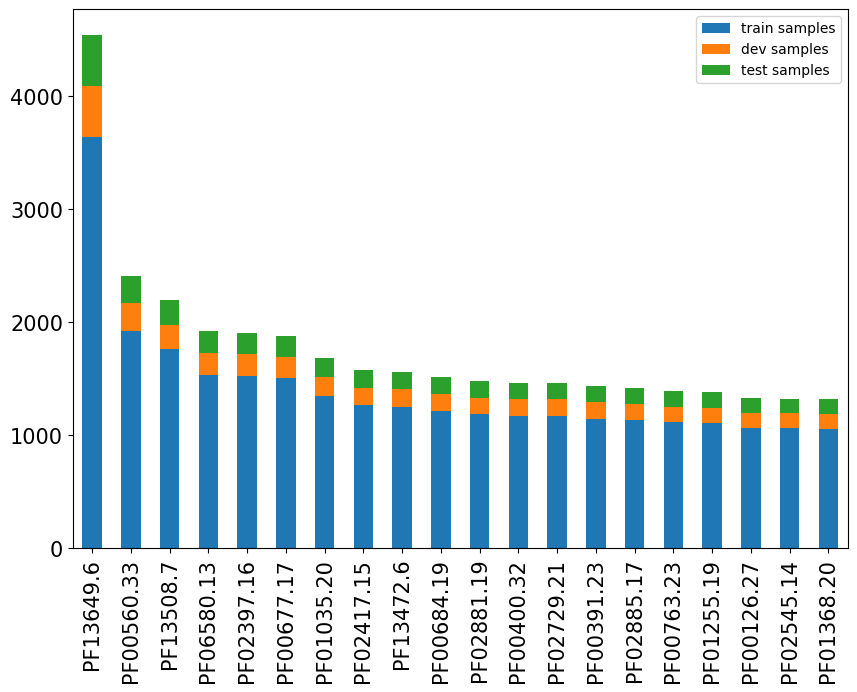

In [14]:
#select 250 most common labels
commonLables = df_train.family_accession.value_counts()[:250]

mask = df_train.family_accession.isin(commonLables.index.values)
train_sm = df_train.loc[mask,:]

nrows = len(train_sm)
total_sample_size = 541
train_sm.groupby('family_accession').head()
train_sm = train_sm.groupby('family_accession', group_keys=False).apply(lambda x: x.sample(total_sample_size))
train_sm = train_sm.sample(frac=1).reset_index(drop=True)

mask = df_val.family_accession.isin(commonLables.index.values)
val_sm = df_val.loc[mask,:]

mask = df_test.family_accession.isin(commonLables.index.values)
test_sm = df_test.loc[mask,:]

valCounts = pd.concat([pd.DataFrame(df_train.family_accession.value_counts()[:20]), 
           pd.DataFrame(df_val.family_accession.value_counts()[:20]), 
           pd.DataFrame(df_test.family_accession.value_counts()[:20])], 
          axis=1)
valCounts.columns = ['train samples', 'dev samples', 'test samples']
valCounts.plot.bar(figsize = (10,7), fontsize = 15, stacked=True)

In [15]:
#Creating a unique int for each label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_le = le.fit_transform(train_sm['family_accession'])
y_val_le = le.transform(val_sm['family_accession'])
y_test_le = le.transform(test_sm['family_accession'])

In [16]:
y_train_le[0],train_sm['family_accession'][0] 

(217, 'PF12951.7')

<ipython-input-17-02e36e46a7c8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['seq_char_count'].values)
<ipython-input-17-02e36e46a7c8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['seq_char_count'].values)
<ipython-input-17-02e36e46a7c8>:8: UserWarning: 

`distplot` is a deprecated

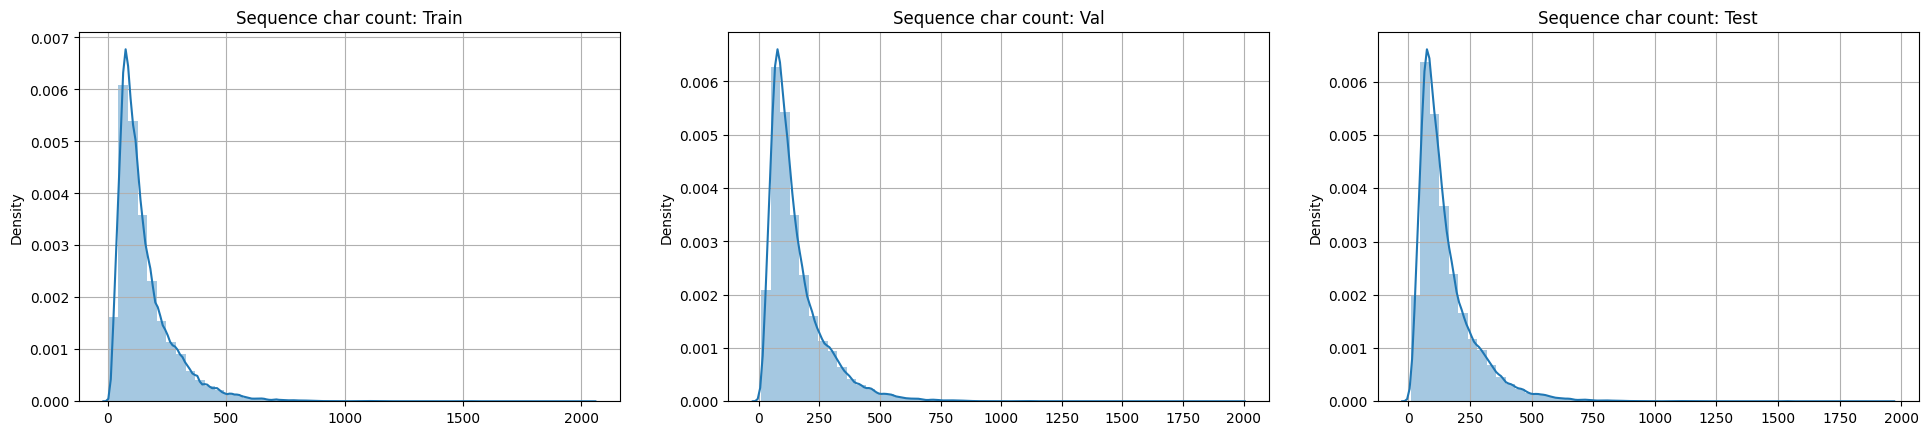

In [17]:
import seaborn as sns

df_train['seq_char_count']= df_train['sequence'].apply(lambda x: len(x))
df_val['seq_char_count']= df_val['sequence'].apply(lambda x: len(x))
df_test['seq_char_count']= df_test['sequence'].apply(lambda x: len(x))

def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

plt.subplot(1, 3, 1)
plot_seq_count(df_train, 'Train')

plt.subplot(1, 3, 2)
plot_seq_count(df_val, 'Val')

plt.subplot(1, 3, 3)
plot_seq_count(df_test, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

Codes: Train
Total unique codes: 25
Codes: Val
Total unique codes: 22
Codes: Test
Total unique codes: 24


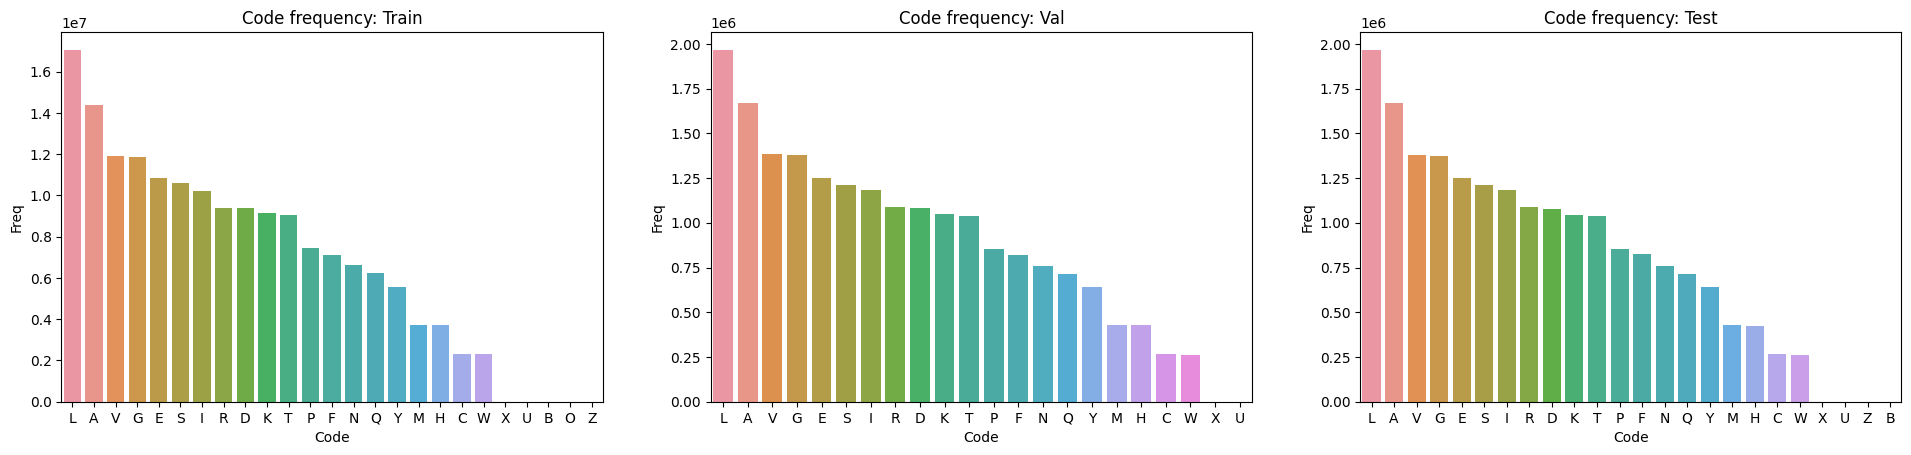

In [18]:
#Inspecting the amino acid codes
from collections import Counter

def get_code_freq(df, data_name):
  
    df = df.apply(lambda x: " ".join(x))
    
#     import pdb; pdb.set_trace()
    codes = []
    for i in df: # concatination of all codes
        codes.extend(i)
#         print(codes)
    
    codes_dict= Counter(codes)
    codes_dict.pop(' ') # removing white space
  
    print(f'Codes: {data_name}')
    print(f'Total unique codes: {len(codes_dict.keys())}')

    df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
    return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]
  
# train code sequence
train_code_freq = get_code_freq(df_train['sequence'], 'Train')

# val code sequence
val_code_freq = get_code_freq(df_val['sequence'], 'Val')

# test code sequence
test_code_freq = get_code_freq(df_test['sequence'], 'Test')

def plot_code_freq(df, data_name):
  
  plt.title(f'Code frequency: {data_name}')
  sns.barplot(x='Code', y='Freq', data=df)

plt.subplot(1, 3, 1)
plot_code_freq(train_code_freq, 'Train')

plt.subplot(1, 3, 2)
plot_code_freq(val_code_freq, 'Val')

plt.subplot(1, 3, 3)
plot_code_freq(test_code_freq, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

In [19]:
#creating encoding dict for the common amino acids
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1

  return char_dict

char_dict = create_dict(codes)

#encoding the sequences using only the common amino acids dict
def integer_encoding(data):
  """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
  """
  
  encode_list = []
  for row in data['sequence'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))
  
  return encode_list
  
train_encode = integer_encoding(train_sm) 
val_encode = integer_encoding(val_sm) 
test_encode = integer_encoding(test_sm)

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 250
train_pad = pad_sequences(train_encode, maxlen=max_length, padding='post', truncating='post')
val_pad = pad_sequences(val_encode, maxlen=max_length, padding='post', truncating='post')
test_pad = pad_sequences(test_encode, maxlen=max_length, padding='post', truncating='post')

print(train_pad.shape, val_pad.shape, test_pad.shape)

(135250, 250) (22917, 250) (22917, 250)


In [21]:
# One hot encoding the sequences
from tensorflow.keras.utils import to_categorical

# Doing the same for the labels
y_train = to_categorical(y_train_le)
y_val = to_categorical(y_val_le)
y_test = to_categorical(y_test_le)

y_train.shape, y_val.shape, y_test.shape

((135250, 250), (22917, 250), (22917, 250))

# Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv1D, Add, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D

x_input = Input(shape=(250))

# embedding layer
emb = Embedding(21, 250, input_length=max_length)(x_input)
# 2 bidirectional LSTMs
bi_rnn1 = Bidirectional(LSTM(250, kernel_regularizer=l2(1e-4), recurrent_regularizer=l2(1e-4), bias_regularizer=l2(1e-4), activity_regularizer=l2(1e-4)))(emb) #dropout=0.2,
x = Dropout(0.2)(bi_rnn1)

# softmax classifier
x_output = Dense(250, activation='softmax')(x)

model1 = Model(inputs=x_input, outputs=x_output)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 250)          5250      
                                                                 
 bidirectional (Bidirectiona  (None, 500)              1002000   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 250)               125250    
                                                                 
Total params: 1,132,500
Trainable params: 1,132,500
Non-trainable params: 0
___________________________________________________

In [ ]:
# Training the model with an early stop
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history1 = model1.fit(
    train_pad, y_train,
    epochs=100, batch_size=256,
    validation_data=(val_pad, y_val),
    )

Epoch 1/100
529/529 [==============================] - 86s 146ms/step - loss: 1.7759 - accuracy: 0.6514 - val_loss: 0.4918 - val_accuracy: 0.9216
Epoch 2/100
529/529 [==============================] - 80s 151ms/step - loss: 0.3695 - accuracy: 0.9496 - val_loss: 0.2868 - val_accuracy: 0.9668
Epoch 3/100
529/529 [==============================] - 81s 154ms/step - loss: 0.2586 - accuracy: 0.9729 - val_loss: 0.2231 - val_accuracy: 0.9791
Epoch 4/100
529/529 [==============================] - 81s 154ms/step - loss: 0.2144 - accuracy: 0.9809 - val_loss: 0.1960 - val_accuracy: 0.9832
Epoch 5/100
529/529 [==============================] - 81s 154ms/step - loss: 0.1780 - accuracy: 0.9869 - val_loss: 0.1859 - val_accuracy: 0.9832
Epoch 6/100
529/529 [==============================] - 81s 154ms/step - loss: 0.1605 - accuracy: 0.9885 - val_loss: 0.1659 - val_accuracy: 0.9862
Epoch 7/100
529/529 [==============================] - 81s 153ms/step - loss: 0.1447 - accuracy: 0.9904 - val_loss: 0.1660 -

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

def display_model_score(model, train, val, test, batch_size):

  train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
  print('Train loss: ', train_score[0])
  print('Train accuracy: ', train_score[1])
  print('-'*70)

  val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
  print('Val loss: ', val_score[0])
  print('Val accuracy: ', val_score[1])
  print('-'*70)
  
  test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
  print('Test loss: ', test_score[0])
  print('Test accuracy: ', test_score[1])

529/529 [==============================] - 28s 54ms/step - loss: 0.0328 - accuracy: 0.9997
Train loss:  0.03278141841292381
Train accuracy:  0.9996894598007202
----------------------------------------------------------------------
90/90 [==============================] - 5s 53ms/step - loss: 0.0424 - accuracy: 0.9968
Val loss:  0.04241039231419563
Val accuracy:  0.9968146085739136
----------------------------------------------------------------------
90/90 [==============================] - 5s 53ms/step - loss: 0.0440 - accuracy: 0.9962
Test loss:  0.04403146728873253
Test accuracy:  0.9962037205696106


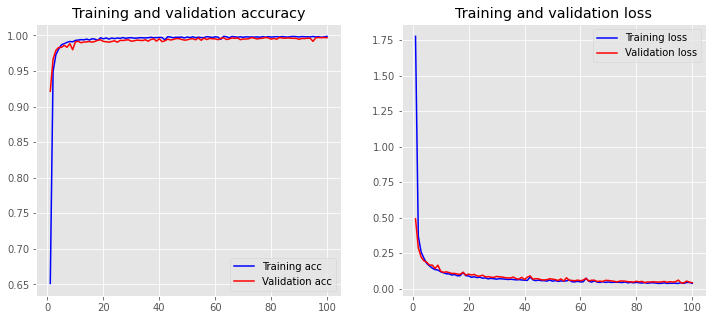

In [ ]:
# Showing the model's results
display_model_score(model1,
    [train_pad, y_train],
    [val_pad, y_val],
    [test_pad, y_test],
    256)

plot_history(history1)

In [22]:
MODEL_PATH = '/content/gdrive/My Drive/Project_MTE/Protein/model/protein_BiLSTM_100.h5'

In [ ]:
model1.save(MODEL_PATH)

#Predict 

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [24]:
def predict_encode(data):
  row_encode = []
  for code in data:
      row_encode.append(char_dict.get(code, 0))

  return np.array(row_encode)

In [25]:
def check_protein_class(encode_class, part_data = "train"):
  Class = ''
  if(part_data == 'train'):
    data_encode = y_train_le
    data_real = train_sm['family_accession']

  elif(part_data == 'test'):
    data_encode = y_test_le
    data_real = test_sm['family_accession']

  elif(part_data == 'val'):
    data_encode = y_val_le
    data_real = val_sm['family_accession']

  for i, data in enumerate(data_encode):
    if(data == encode_class):
      Class = data_real[i]
      break

  return Class

In [26]:
reconstructed_model = keras.models.load_model(MODEL_PATH)

In [54]:
wrong_predict = {}

In [30]:
idx = np.random.randint(0,100)
data_test = train_sm['sequence'][idx]
true_class = train_sm['family_accession'][idx]
true_class

'PF02397.16'

In [70]:
def predict_protein(idx):
  data = train_sm['sequence'][idx]
  true_class = train_sm['family_accession'][idx]
  data_test = predict_encode(data)
  data_test=data_test.reshape(1,data_test.shape[0])
  data_test = pad_sequences(data_test, maxlen=max_length, padding='post', truncating='post')
  y_pred = np.argmax(reconstructed_model.predict(data_test, verbose = 0))
  class_pred = check_protein_class(y_pred, 'train')
  eval = True if class_pred == true_class else False
  if eval == False:
    wrong_predict[str(idx)] = [data, true_class, class_pred]
    print("find error predict !!")
  return wrong_predict


In [72]:
for i in range(len(train_sm['sequence'])):
  predict_protein(i)

find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!
find error predict !!


KeyboardInterrupt: ignored

In [73]:
wrong_predict

{'56': ['ASQIARPFRHSLKKKLDKCTSKPTLIGLLANQDPASKKYAEWTAKTCQETGVQFELAQVNKHELELEIIKANHNKDIHGIMVYYPVFGYPLDMSLQNRVNYFKDVE',
  'PF00763.23',
  'PF02410.15'],
 '202': ['KWRKNDQDTGSPRIVVAILTEKIVYLTKHMQQHPHDYHSRRGLITMVNKRRRQLNYYFKKEPKECLEMCATLGIR',
  'PF00312.22',
  'PF13976.6'],
 '666': ['LDYVVHRQYGIGKYMGITTKEIEGIHKDFMRILYRDGDELFVPLEQFNLVRKFMSREAASVRLSKLGTSTWQKNKERIKQDVADVADKLVTLY',
  'PF02559.16',
  'PF02021.17'],
 '1006': ['ETIASARQRMQHRNPGGVCNRDLPATALGDRSGFGAAALQLWERLVAHRGLSTRSGIRLLRVARTVADLNGENEASADAVAQASHYR',
  'PF13335.6',
  'PF10589.9'],
 '2501': ['FIATDLTNFDRWIFIPPKFRMKCTEGCYITAKVTQHPFKDGRAQAKITQNVGDDNTPYIEKLYSVCKHRLDNEFS',
  'PF17876.1',
  'PF14698.6'],
 '3033': ['HSVVMHITTGVCRIQDIQEKQFTEDQHQKYYVLQPIFEKGTTLFVPIENDPVRIRPLLTKEAITELLHELSAQEDEPWIHNQHQRTAHFKTILKNGNEQEILSMLH',
  'PF02559.16',
  'PF02033.18'],
 '6401': ['QYNRLRSGMDDVQRRLAELRASADSDDGLIRATVGPRGQLLDLRLDRRIYRDMDAAELSRKIVTTVEQATAKATQQVEQLMADY',
  'PF02575.16',
  'PF02583.17'],
 '6863': ['QVEIVTVSRLVEKKGVEYGIRAVAKLLKNQKKNINYTIVGDGP